# Air Quality Analysis

---

> <left><img src="https://i.insider.com/5e9f6098f242ab242715a696?width=1200&format=jpeg" width=900 ></left>


> The novel corona virus disease pandemic poses a cruel choice to the world: the society and economy. It has revealed the vulnerabilities and strengths of every country and has taught us a series of lifelong lessons. India had bad track record in air quality. Here I will present how COVID-19 (before and after) effect on environment especially on air pollution in India and classifying the air quality condition using multiclass classification tools.

---



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing Packages and Dataset" data-toc-modified-id="Importing Packages and Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Packages and Dataset</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Exploratory Data Analysis" data-toc-modified-id="Exploratory Data Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Visualisation</a></span><ul class="toc-item"><li><span><a href="#Data Visualisation" data-toc-modified-id="Data Visualisation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Pre COVID19</a></span></li><li><span><a href="#Pre COVID19" data-toc-modified-id="Pre COVID19-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Post COVID19</a></span></li></ul></li><li><span><a href="#Post COVID19" data-toc-modified-id="Post COVID19-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocessing</a></span><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Classification</a></span><ul class="toc-item"><li><span><a href="#Classification" data-toc-modified-id="Classification-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Support Vector Machine </a></span></li><li><span><a href="#Support Vector Machine" data-toc-modified-id="Support Vector Machine-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Random Forest Classifier" data-toc-modified-id="Random Forest Classifier-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Extra Gradient Booost Classifier</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></div>

## Importing Packages and Dataset

In [1]:
#loading
import pandas as pd
import numpy as np
import missingno as msno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



     |████████████████████████████████| 64 kB 1.2 MB/s 












You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
data = pd.read_csv("../input/air-quality-pre-and-post-covid19-pandemic/City_day.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 26219 entries, 0 to 26218

Data columns (total 16 columns):

 #   Column       Non-Null Count  Dtype         

---  ------       --------------  -----         

 0   City         26219 non-null  object        

 1   Date         26219 non-null  datetime64[ns]

 2   PM2.5        21930 non-null  float64       

 3   PM10         15453 non-null  float64       

 4   NO           22986 non-null  float64       

 5   NO2          23002 non-null  float64       

 6   NOx          22176 non-null  float64       

 7   NH3          16372 non-null  float64       

 8   CO           24258 non-null  float64       

 9   SO2          22675 non-null  float64       

 10  O3           22559 non-null  float64       

 11  Benzene      20932 non-null  float64       

 12  Toluene      18664 non-null  float64       

 13  Xylene       9412 non-null   float64       

 14  AQI          21937 non-null  float64       

 15  Air_quality  21937 non-null  obje

## **Exploratory Data Analysis**

**Missing value  analysis and Treatment**

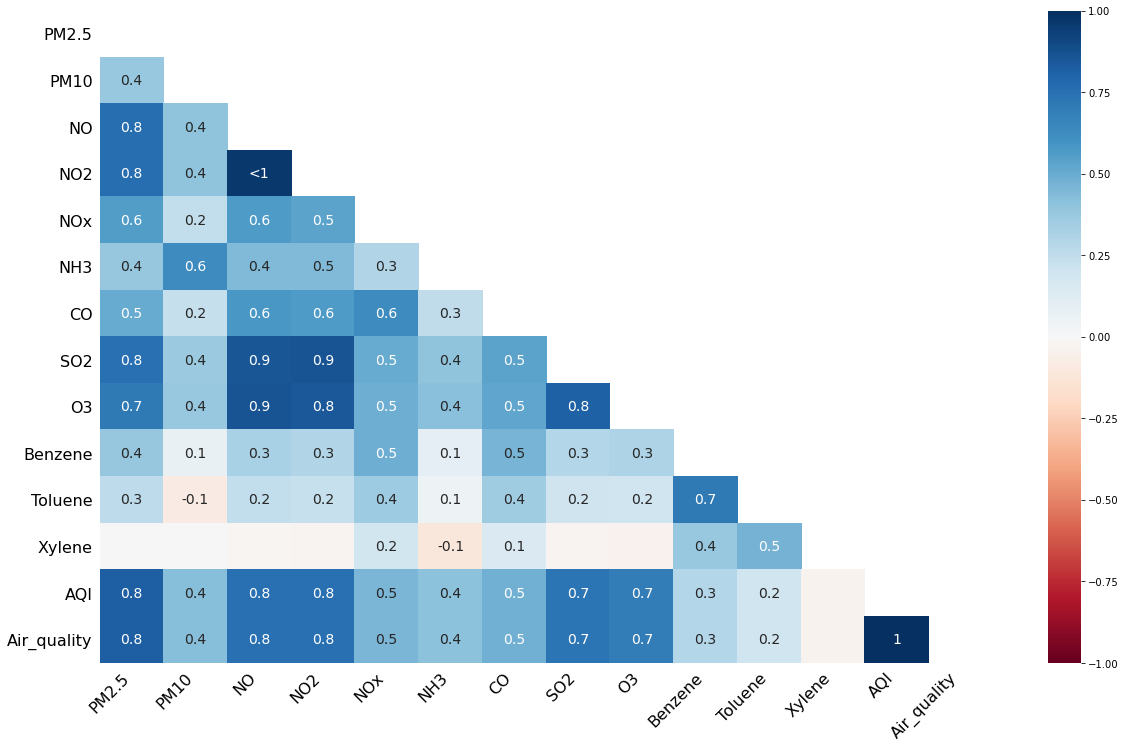

In [4]:
msno.heatmap(data)

In [5]:
df1 = data.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['Air_quality']=df1['Air_quality'].fillna('Moderate')

## Pre Corona [2016 to 2020]

**Here I divide the data set into two part namely Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene) and find how these contents correlated with AQI (air quality index)**

In [6]:
df = df1.copy()
df = df[df['Date'] <= ('01-01-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 23424 entries, 0 to 26097

Data columns (total 6 columns):

 #   Column                        Non-Null Count  Dtype         

---  ------                        --------------  -----         

 0   City                          23424 non-null  object        

 1   Date                          23424 non-null  datetime64[ns]

 2   AQI                           23424 non-null  float64       

 3   Air_quality                   23424 non-null  object        

 4   Vehicular Pollution content   23424 non-null  float64       

 5   Industrial Pollution content  23424 non-null  float64       

dtypes: datetime64[ns](1), float64(3), object(2)

memory usage: 1.3+ MB


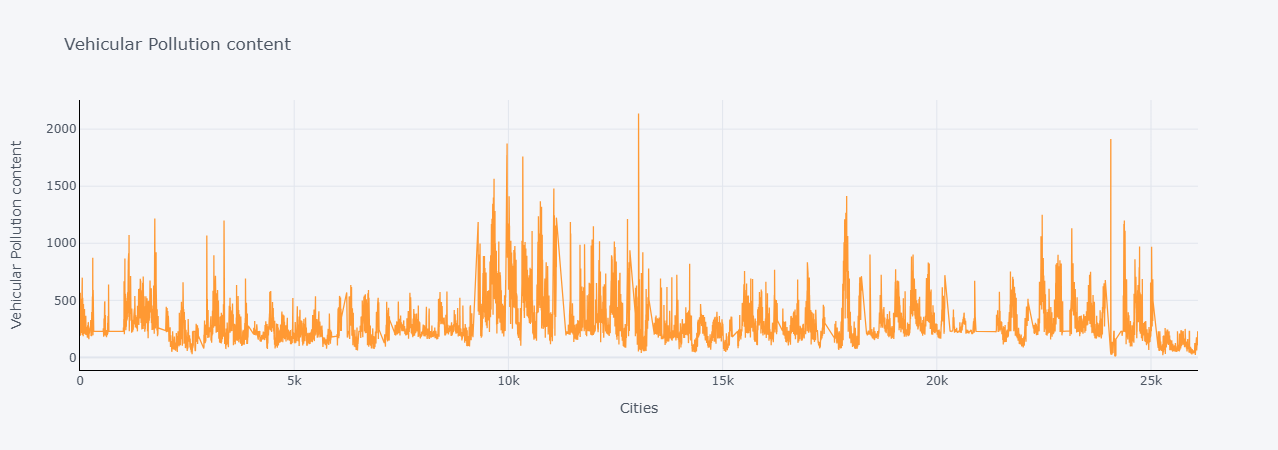

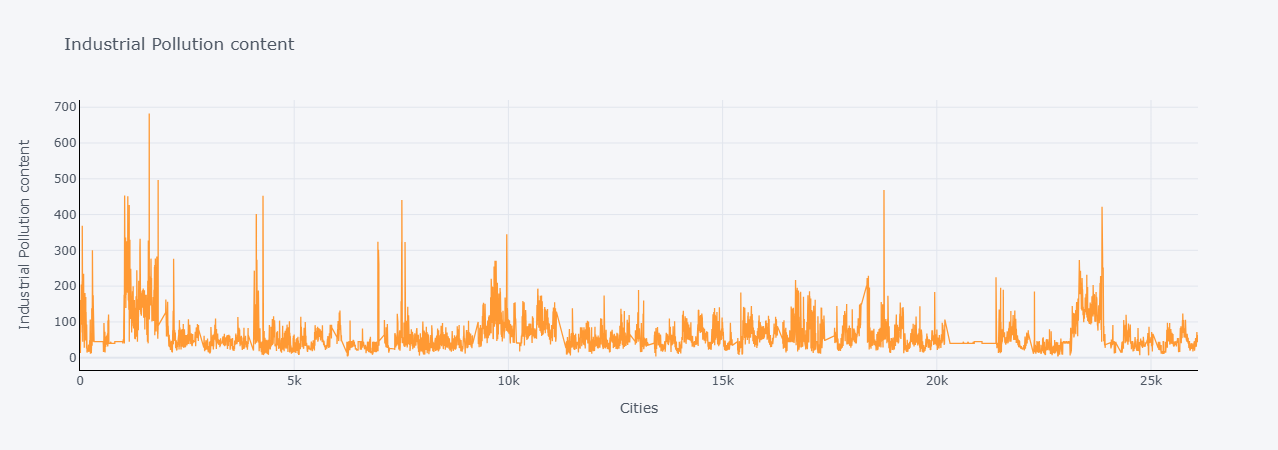

In [7]:
def ploting(var):
    df[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black', )
    plt.show()
ploting('Vehicular Pollution content')
ploting('Industrial Pollution content')

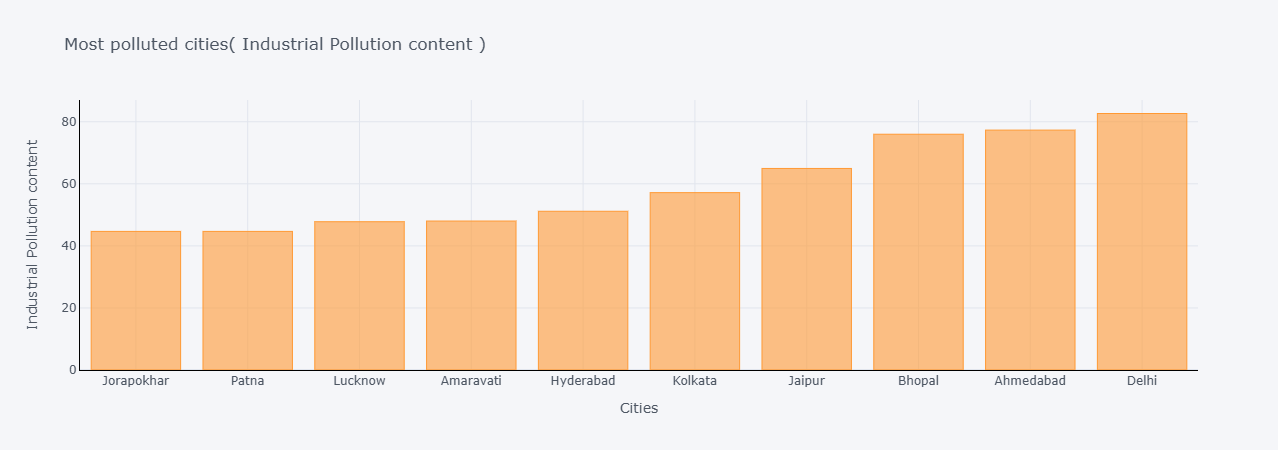

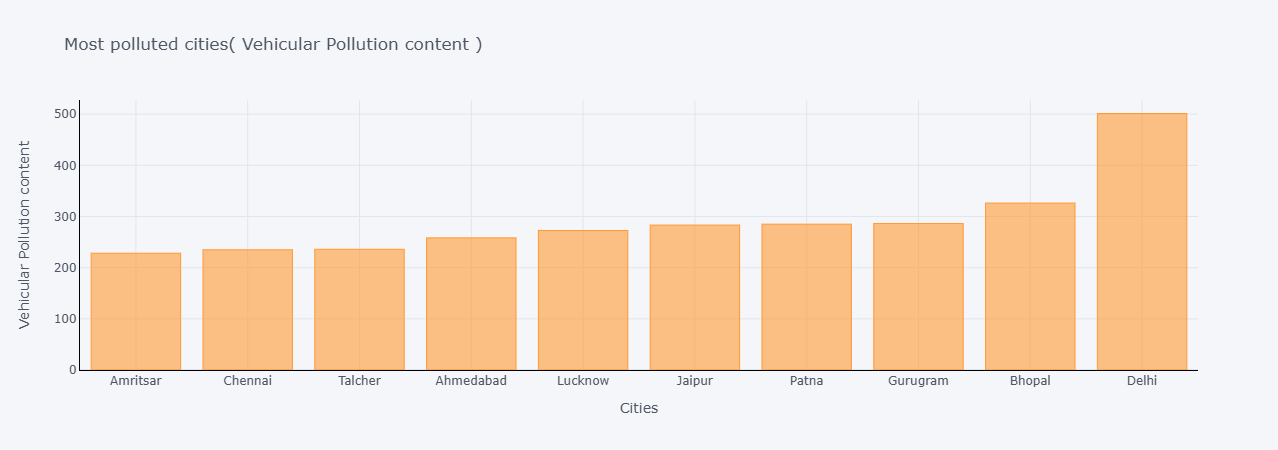

In [8]:
def max_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p1 = max_bar_plot('Industrial Pollution content')
p2 = max_bar_plot('Vehicular Pollution content')

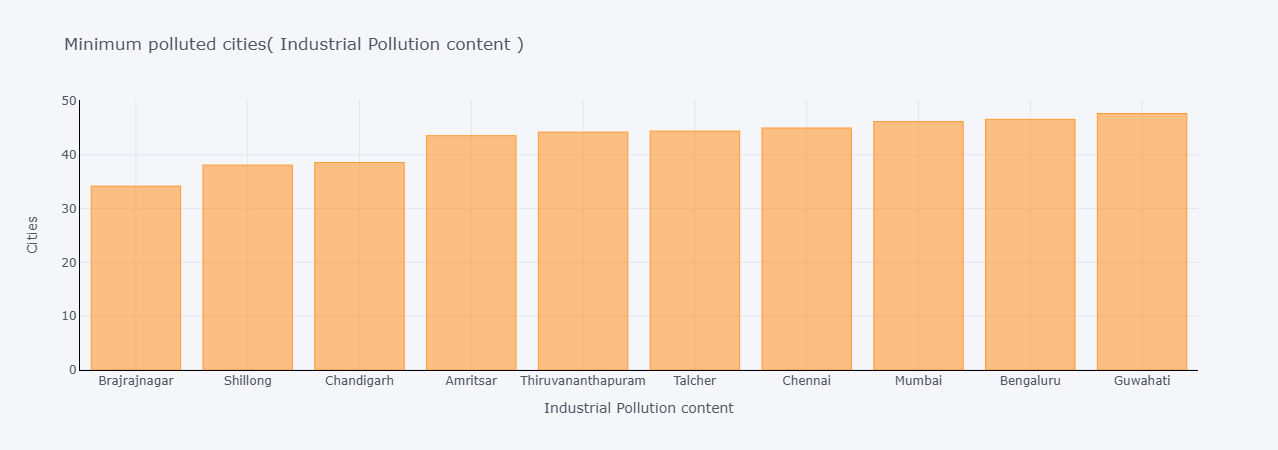

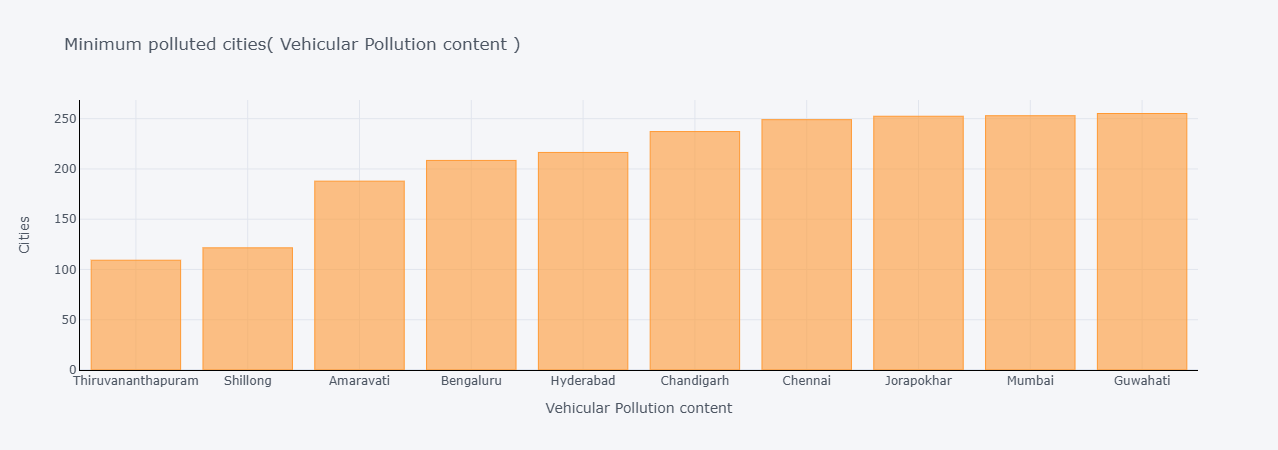

In [9]:
def min_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industrial Pollution content')
p2 = min_bar_plot('Vehicular Pollution content')

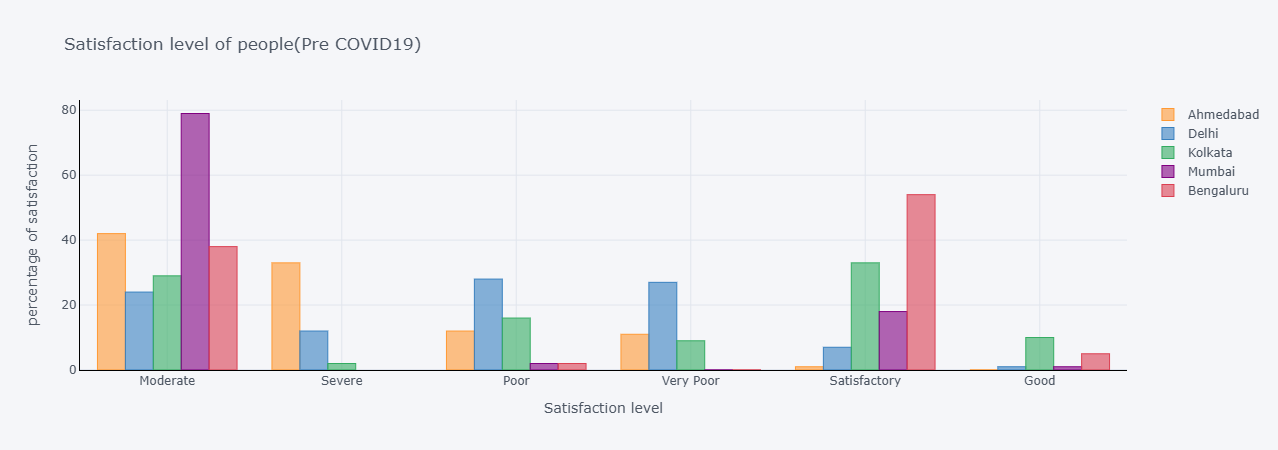

In [10]:
def al(var):
    cities = [var]
    filtered_city_day = df1[df1['Date'] <= '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','Air_quality']]
    AQI[var] = AQI['Air_quality']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
df_row = pd.concat([c11,c22,c33,c44,c55],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Pre COVID19)')

## Post Corona [2020 >]

In [11]:
df = df1.copy()
df = df[df['Date'] > ('01-01-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 2795 entries, 1827 to 26218

Data columns (total 6 columns):

 #   Column                        Non-Null Count  Dtype         

---  ------                        --------------  -----         

 0   City                          2795 non-null   object        

 1   Date                          2795 non-null   datetime64[ns]

 2   AQI                           2795 non-null   float64       

 3   Air_quality                   2795 non-null   object        

 4   Vehicular Pollution content   2795 non-null   float64       

 5   Industrial Pollution content  2795 non-null   float64       

dtypes: datetime64[ns](1), float64(3), object(2)

memory usage: 152.9+ KB


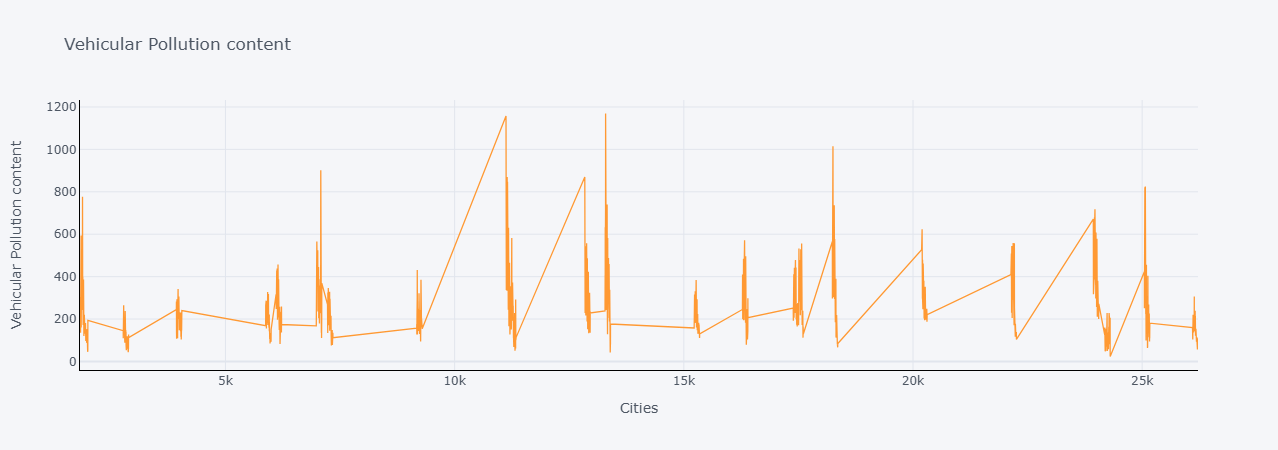

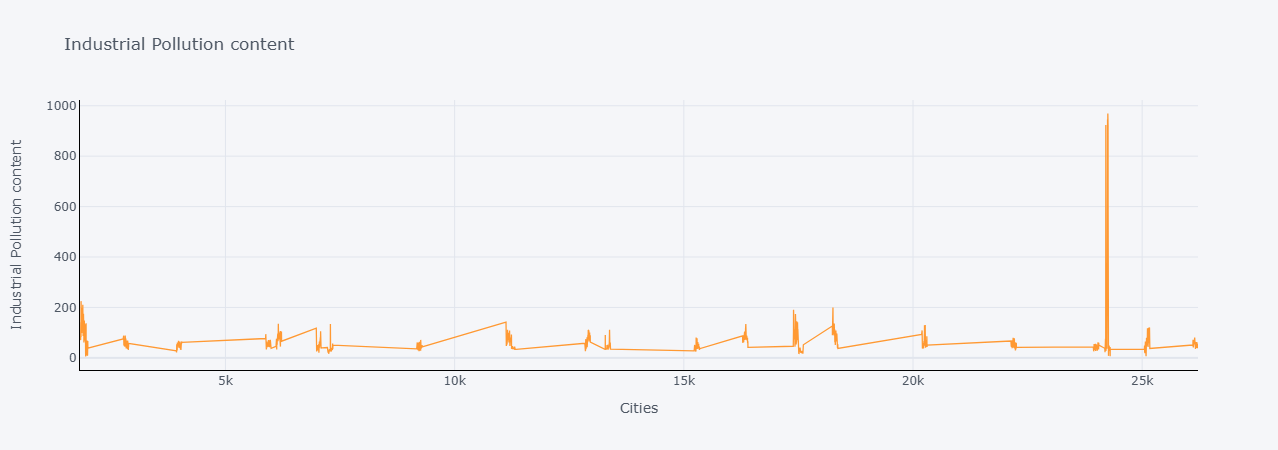

In [12]:
def ploting(var):
    df[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black', )
    plt.show()
ploting('Vehicular Pollution content')
ploting('Industrial Pollution content')

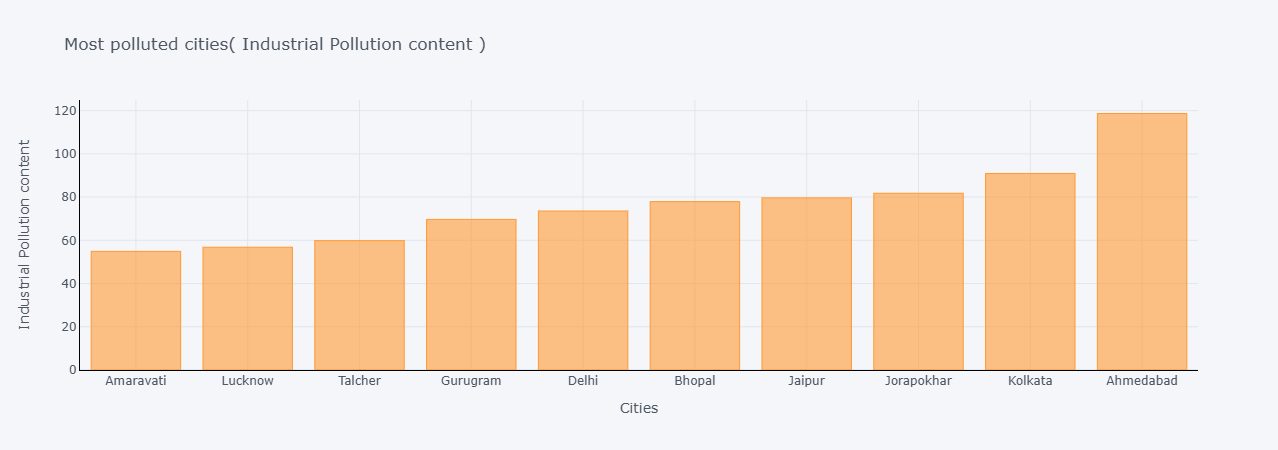

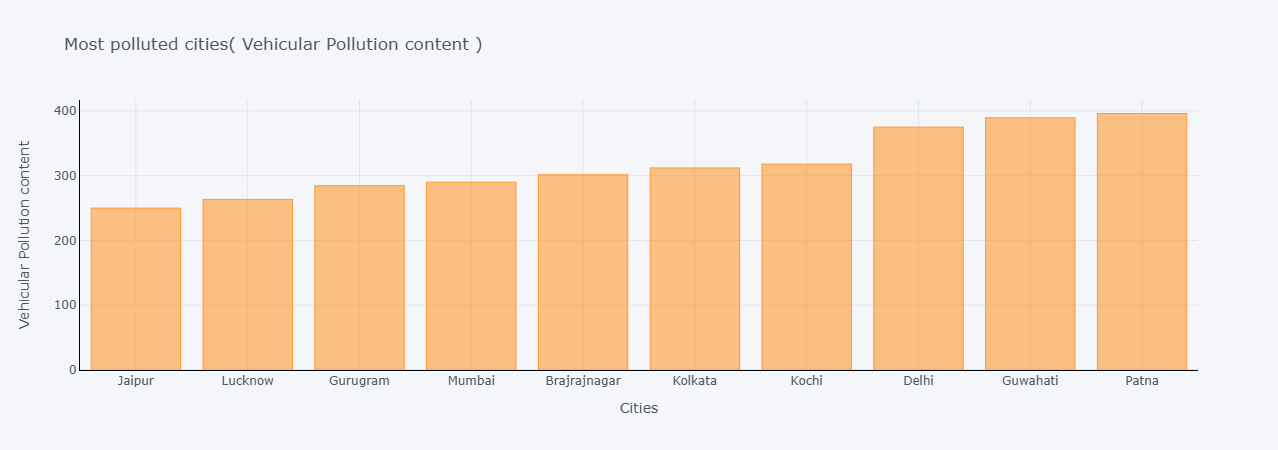

In [13]:
def max_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p1 = max_bar_plot('Industrial Pollution content')
p2 = max_bar_plot('Vehicular Pollution content')

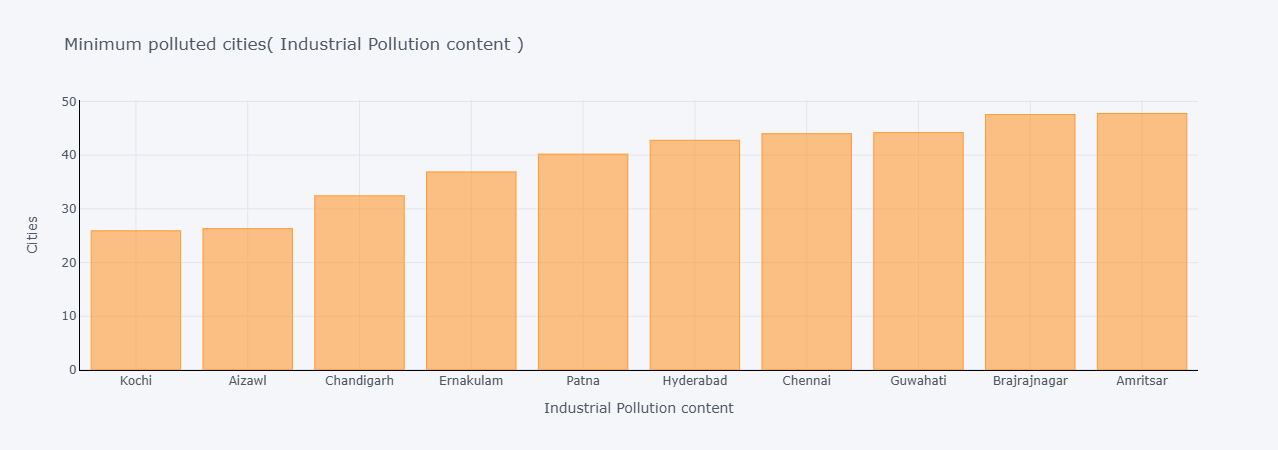

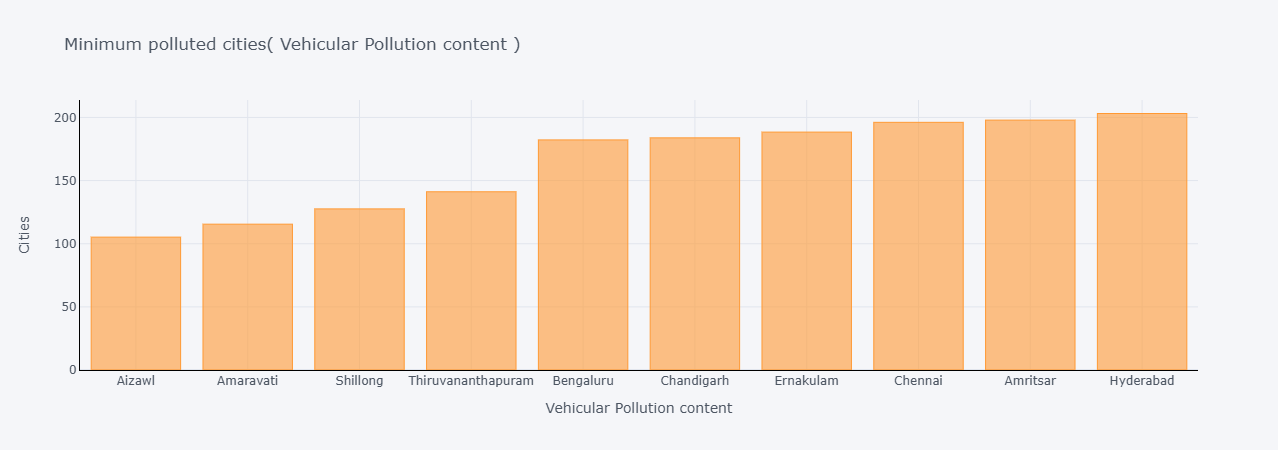

In [14]:
def min_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industrial Pollution content')
p2 = min_bar_plot('Vehicular Pollution content')

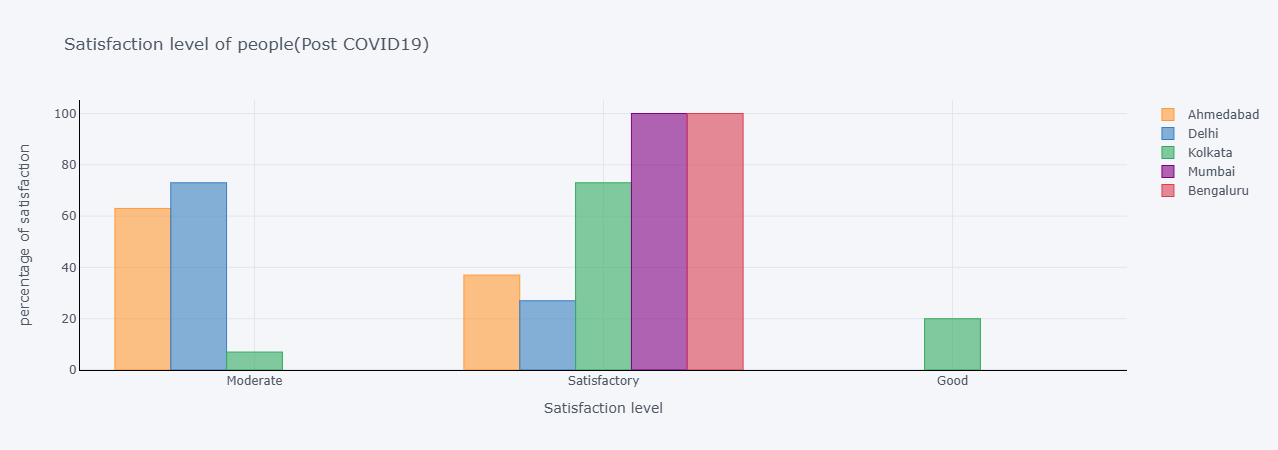

In [15]:
def al(var):
    cities = [var]
    filtered_city_day = df1[df1['Date'] > '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','Air_quality']]
    AQI[var] = AQI['Air_quality']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
df_row = pd.concat([c11,c22,c33,c44,c55],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Post COVID19)')

## Preprocessing

In [16]:
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['Air_quality']=le.fit_transform(df1['Air_quality'].astype(str))
df1.info()

categorical_attributes ['City', 'Air_quality']

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 26219 entries, 0 to 26218

Data columns (total 16 columns):

 #   Column       Non-Null Count  Dtype         

---  ------       --------------  -----         

 0   City         26219 non-null  int64         

 1   Date         26219 non-null  datetime64[ns]

 2   PM2.5        26219 non-null  float64       

 3   PM10         26219 non-null  float64       

 4   NO           26219 non-null  float64       

 5   NO2          26219 non-null  float64       

 6   NOx          26219 non-null  float64       

 7   NH3          26219 non-null  float64       

 8   CO           26219 non-null  float64       

 9   SO2          26219 non-null  float64       

 10  O3           26219 non-null  float64       

 11  Benzene      26219 non-null  float64       

 12  Toluene      26219 non-null  float64       

 13  Xylene       26219 non-null  float64       

 14  AQI          26219 non-null  float6

In [17]:
cor = df1.corr()
cor.style.background_gradient(cmap='coolwarm')

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
City,1.000000,0.086778,-0.029781,0.055428,-0.127084,0.034389,-0.154963,-0.267223,-0.109597,-0.010628,-0.005597,-0.079653,-0.070967,-0.119162,-0.036262
PM2.5,0.086778,1.000000,0.512106,0.445142,0.350113,0.371157,0.151714,0.081443,0.110820,0.158501,0.028943,0.128363,0.090379,0.619049,0.420532
PM10,-0.029781,0.512106,1.000000,0.450666,0.345000,0.419094,0.189825,0.018488,0.160203,0.199737,0.024012,0.119933,0.025211,0.436605,0.220225
NO,0.055428,0.445142,0.450666,1.000000,0.487730,0.748641,0.150606,0.225386,0.174288,0.035620,0.047622,0.158014,0.084178,0.447853,0.276824
NO2,-0.127084,0.350113,0.345000,0.487730,1.000000,0.579207,0.157345,0.369663,0.394567,0.308769,0.040419,0.299835,0.186598,0.537277,0.271704
NOx,0.034389,0.371157,0.419094,0.748641,0.579207,1.000000,0.119993,0.230434,0.202624,0.102013,0.049306,0.185469,0.080719,0.434976,0.212622
NH3,-0.154963,0.151714,0.189825,0.150606,0.157345,0.119993,1.000000,-0.015794,-0.050047,0.077762,0.002948,0.019276,-0.026703,0.086308,0.069953
CO,-0.267223,0.081443,0.018488,0.225386,0.369663,0.230434,-0.015794,1.000000,0.478073,0.047047,0.067161,0.288368,0.193229,0.653542,0.219298
SO2,-0.109597,0.110820,0.160203,0.174288,0.394567,0.202624,-0.050047,0.478073,1.000000,0.173674,0.038739,0.275231,0.260678,0.454992,0.174140
O3,-0.010628,0.158501,0.199737,0.035620,0.308769,0.102013,0.077762,0.047047,0.173674,1.000000,0.026266,0.148649,0.094369,0.196508,0.036906


In [18]:
y = df1["Air_quality"]
x = df1[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [19]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({1: 8397, 3: 4835, 2: 1873, 5: 1641, 4: 935, 0: 672})


> **Data Imbalance:**

>  Here we observe that target label is not splitted eqaully. This will cause data imbalance problem. In order to overcome this problem we use the technique called SMOTE(Synthetic Minority Oversampling Technique). This approach solve this problem by oversample the examples in the minority class.

In [20]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({1: 8397, 4: 8397, 3: 8397, 0: 8397, 5: 8397, 2: 8397})


## Classification

In [21]:
cls=SVC()
cls.fit(X_train,y_train)
svmpred=cls.predict(X_test)
svmpred
cm=confusion_matrix(y_test,svmpred)
print("confussion matrix")
print(cm)
print("\n")
accuracy=accuracy_score(y_test,svmpred)
print("accuracy",accuracy*100)

confussion matrix

[[ 256    0    0    2    0    0]

 [   0 3516   61  121    0    0]

 [   0    0  794    0    0   24]

 [  96    5    0 1911    0    0]

 [   0    0    0    0  399    3]

 [   0    0    0    0   12  666]]





accuracy 95.88100686498856


In [22]:
rf = RandomForestClassifier(n_estimators=20, random_state=23)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)
rf_predict1=rf.predict(X_train)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("accuracy",rf_acc_score*100)

confussion matrix

[[ 258    0    0    0    0    0]

 [   0 3697    1    0    0    0]

 [   0    1  817    0    0    0]

 [   0    1    0 2011    0    0]

 [   0    0    0    0  402    0]

 [   0    0    1    0    1  676]]





accuracy 99.93643529112637


In [23]:
gbc=XGBClassifier(learning_rate =0.01,n_estimators=100,max_depth=1,
                  min_child_weight=6,subsample=0.8,seed=13)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)*100
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("accuracy",accuracy)

confussion matrix

[[ 258    0    0    0    0    0]

 [   0 3698    0    0    0    0]

 [   0    0  818    0    0    0]

 [   0    0    0 2012    0    0]

 [   0    0    0    0  402    0]

 [   0    0    0    0    0  678]]





accuracy 100.0


## Conclusion

>1. Vehicular pollution contents are more related to air quality index.
>2. Delhi is the most polluted city in terms of vehicular pollution contents.
>3. Ahmadabad is the most polluted city in terms of industrial pollution content.
>4. After COVID19 pandemic there is gradual dicrease in vehicular pollution contents, industrial pollution content.
>5. Extra Gradient Boost classifier 100% accurately classify the target variable.

**Feel free to ask any question related to this topic. I'm happy to answer. If you like my work kindly upvote.**

**HAPPY LEARNING :-)**